In [1]:
integral_count = 1000

def integral_by_trapezoidal_rule(f, start_x, end_x):
    sum = 0
    width = (end_x - start_x) / integral_count
    for i in range(integral_count):
        area = width * (f(start_x + i*width) + f(start_x + (i + 1)*width)) / 2
        sum += area
    
    return sum    

In [2]:
def y(x):
    return x

In [3]:
# 積分関数正しいかチェック
area = integral_by_trapezoidal_rule(y, 0, 30)
print(area)

450.0000000000001


In [11]:
# 方程式を定義
import numpy as np
import math
import functools

# 定数
a = 5
b = 5

def func_r(q):
    value = q / (1 - b + b * q) ** 2
    return value


def func_g_integrand(z, m, q):
    integrand = (1 / math.sqrt(2 * np.pi)) * math.exp(-z**2/2) * np.tanh(b * (m + math.sqrt(a * func_r(q)) * z)) ** 2
    return integrand

    
def func_f_integrand(z, m, q):
    integrand =  (1 / math.sqrt(2 * np.pi)) * math.exp(-z**2/2) * np.tanh(b * (m + math.sqrt(a * func_r(q)) * z))
    return integrand
    

def func_g(m, q):
    func = functools.partial(func_g_integrand, m=m, q=q)
    value =  integral_by_trapezoidal_rule(func,  -100, 100)
    return value
    
    
def func_f(m, q):
    func = functools.partial(func_f_integrand, m=m, q=q)
    value = integral_by_trapezoidal_rule(func,  -100, 100)
    return value

In [5]:
# ニュートン法の更新式を定義

def differential_of_sqrt_r(q):
    value_1 = 1 / (2 * math.sqrt(r(q)) )
    denominator_of_value_2 = 1 - 2*q * (b-1-q) - (b-1-q)**2
    numerator_of_value_2 = (1 - (b-1-q)**2 )**2
    return value_1 * numerator_of_value_2 / denominator_of_value_2
    

# j11
def j_11_integrand(z, m, q):
    integrand =  (1 / math.sqrt(2 * np.pi)) * math.exp(-z**2/2) / np.cosh(b * (m + math.sqrt(a * r(q)) * z))**2    * b
    return integrand
    
def j_11(m, q):
    func = functools.partial(j_11_integrand, m=m, q=q)
    return 1 - integral_by_trapezoidal_rule(func, -100, 100)    


# j12
def j_12_integrand(z, m, q):
    integrand =  (1 / math.sqrt(2 * np.pi)) * math.exp(-z**2/2) / np.cosh(b * (m + math.sqrt(a * r(q)) * z))**2    * math.sqrt(a)*z* differential_of_sqrt_r(q)
    return integrand
    
def j_12(m, q):
    func = functools.partial(j_12_integrand, m=m, q=q)
    return 1 - integral_by_trapezoidal_rule(func, -100, 100)

    
# j21
def j_21_integrand(z, m, q):
    integrand =  (1 / math.sqrt(2 * np.pi)) * math.exp(-z**2/2) / np.cosh(b * (m + math.sqrt(a * r(q)) * z))**2    * b    * 2*np.tanh(b * (m + math.sqrt(a * r(q)) * z))
    return integrand
    
def j_21(m, q):
    func = functools.partial(j_21_integrand, m=m, q=q)
    return 1 - integral_by_trapezoidal_rule(func, -100, 100)
    

# j22
def j_22_integrand(z, m, q):
    integrand =  (1 / math.sqrt(2 * np.pi)) * math.exp(-z**2/2) / np.cosh(b * (m + math.sqrt(a * r(q)) * z))**2    * math.sqrt(a)*z* differential_of_sqrt_r(q)    *2*np.tanh(b * (m + math.sqrt(a * r(q)) * z))
    return integrand
    
def j_22(m, q):
    func = functools.partial(j_22_integrand, m=m, q=q)
    return 1 - integral_by_trapezoidal_rule(func, -100, 100)


# calculate det
def get_matrics_info(m, q):
    j11 = j_11(m, q)
    j12 = j_12(m, q)
    j21 = j_21(m, q)
    j22 = j_22(m, q)
    return {"det": j11*j22 - j12*j21, "matrics":[[0, 0, 0], [0, j11, j12], [0, j21, j22]]}
    
    
    

In [6]:
# # 更新フロー
# # ？？m, qの初期値は、いくつから始めればいい？？
# m = 0
# q  = 0

# sub = 0.001
# while 1==1:
#     J = get_matrics_info(m, q)
#     next_m = m - (J["matrics"][2][2]*m -  J["matrics"][1][2]*q) / J["det"]
#     next_q =  q  - (-J["matrics"][2][1]*m +  J["matrics"][1][1]*q) / J["det"]
#     hypotenuse = math.sqrt((next_m - m)**2 + (next_q - q)**2)
#     if hypotenuse < sub:
#         break
#     else:
#         m = next_m
#         q = next_q
#         print("next_m is")
#         print(next_m)
#         print("next_q is")
#         print(next_q)

In [7]:
#  そもそも各方程式があっているか
#  0除算の回避

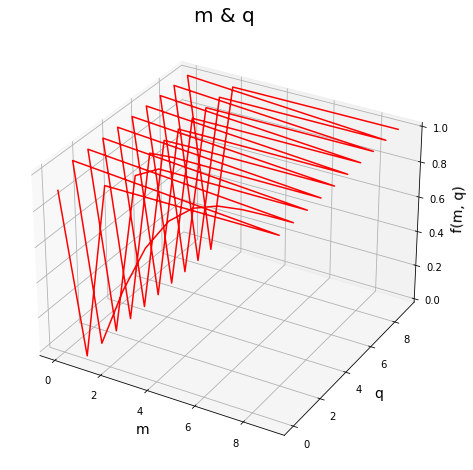

In [20]:
# m, q のプロット

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a = 5
b = 5

# Figureを追加
fig = plt.figure(figsize = (8, 8))

# 3DAxesを追加
ax = fig.add_subplot(111, projection='3d')

# Axesのタイトルを設定
ax.set_title("m & q", size = 20)

# 軸ラベルを設定
ax.set_xlabel("m", size = 14)
ax.set_ylabel("q", size = 14)
ax.set_zlabel("f(m, q)", size = 14)

# 軸目盛を設定
# ax.set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
# ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])

length = 10
x = np.arange(length)
y = np.arange(length)

X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()
X, Y
# Z = np.fromfunction(lambda i, j: func_f(i, j), (10000,10000))
Z = np.ndarray([])
for i in range(len(Y)-1):
    Z = np.append(Z, func_f(X[i], Y[i]))

# 曲線を描画
ax.plot(X, Y, Z, color = "red")

plt.show()

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])